# Instruction of Using This Code
Please note that this code can not only extract historical stock data from Yahoo Finance, but could also construct an Index by implementing Market Capitalization.

## For extract stock data and plot
Step 1: Please change ```tickers``` (and ```exclude_tickers```, not necessary) according to your interest of research.     

Step 2: If tickers will be ploted into separate graphs, please also adjust the categories   

Step 3: If want to empathsise the background of plot, please change the date of policy or crisis          
        
        axs[i].axvspan(pd.to_datetime("2019.12.27"), pd.to_datetime("2021.12.21"), color='red', alpha=0.3)   
         axs[i].axvspan(pd.to_datetime("2023.01.01"), pd.to_datetime("2023.02.03"), color='green', alpha=0.3) 
Step 4: Please adapt interest timeframe for ```start_date``` and ```end_date```   

[*********************100%%**********************]  15 of 15 completed


Returns for tickers from 2017-12-29 to 2024-06-20 have been calculated and saved to tickers_returns.csv


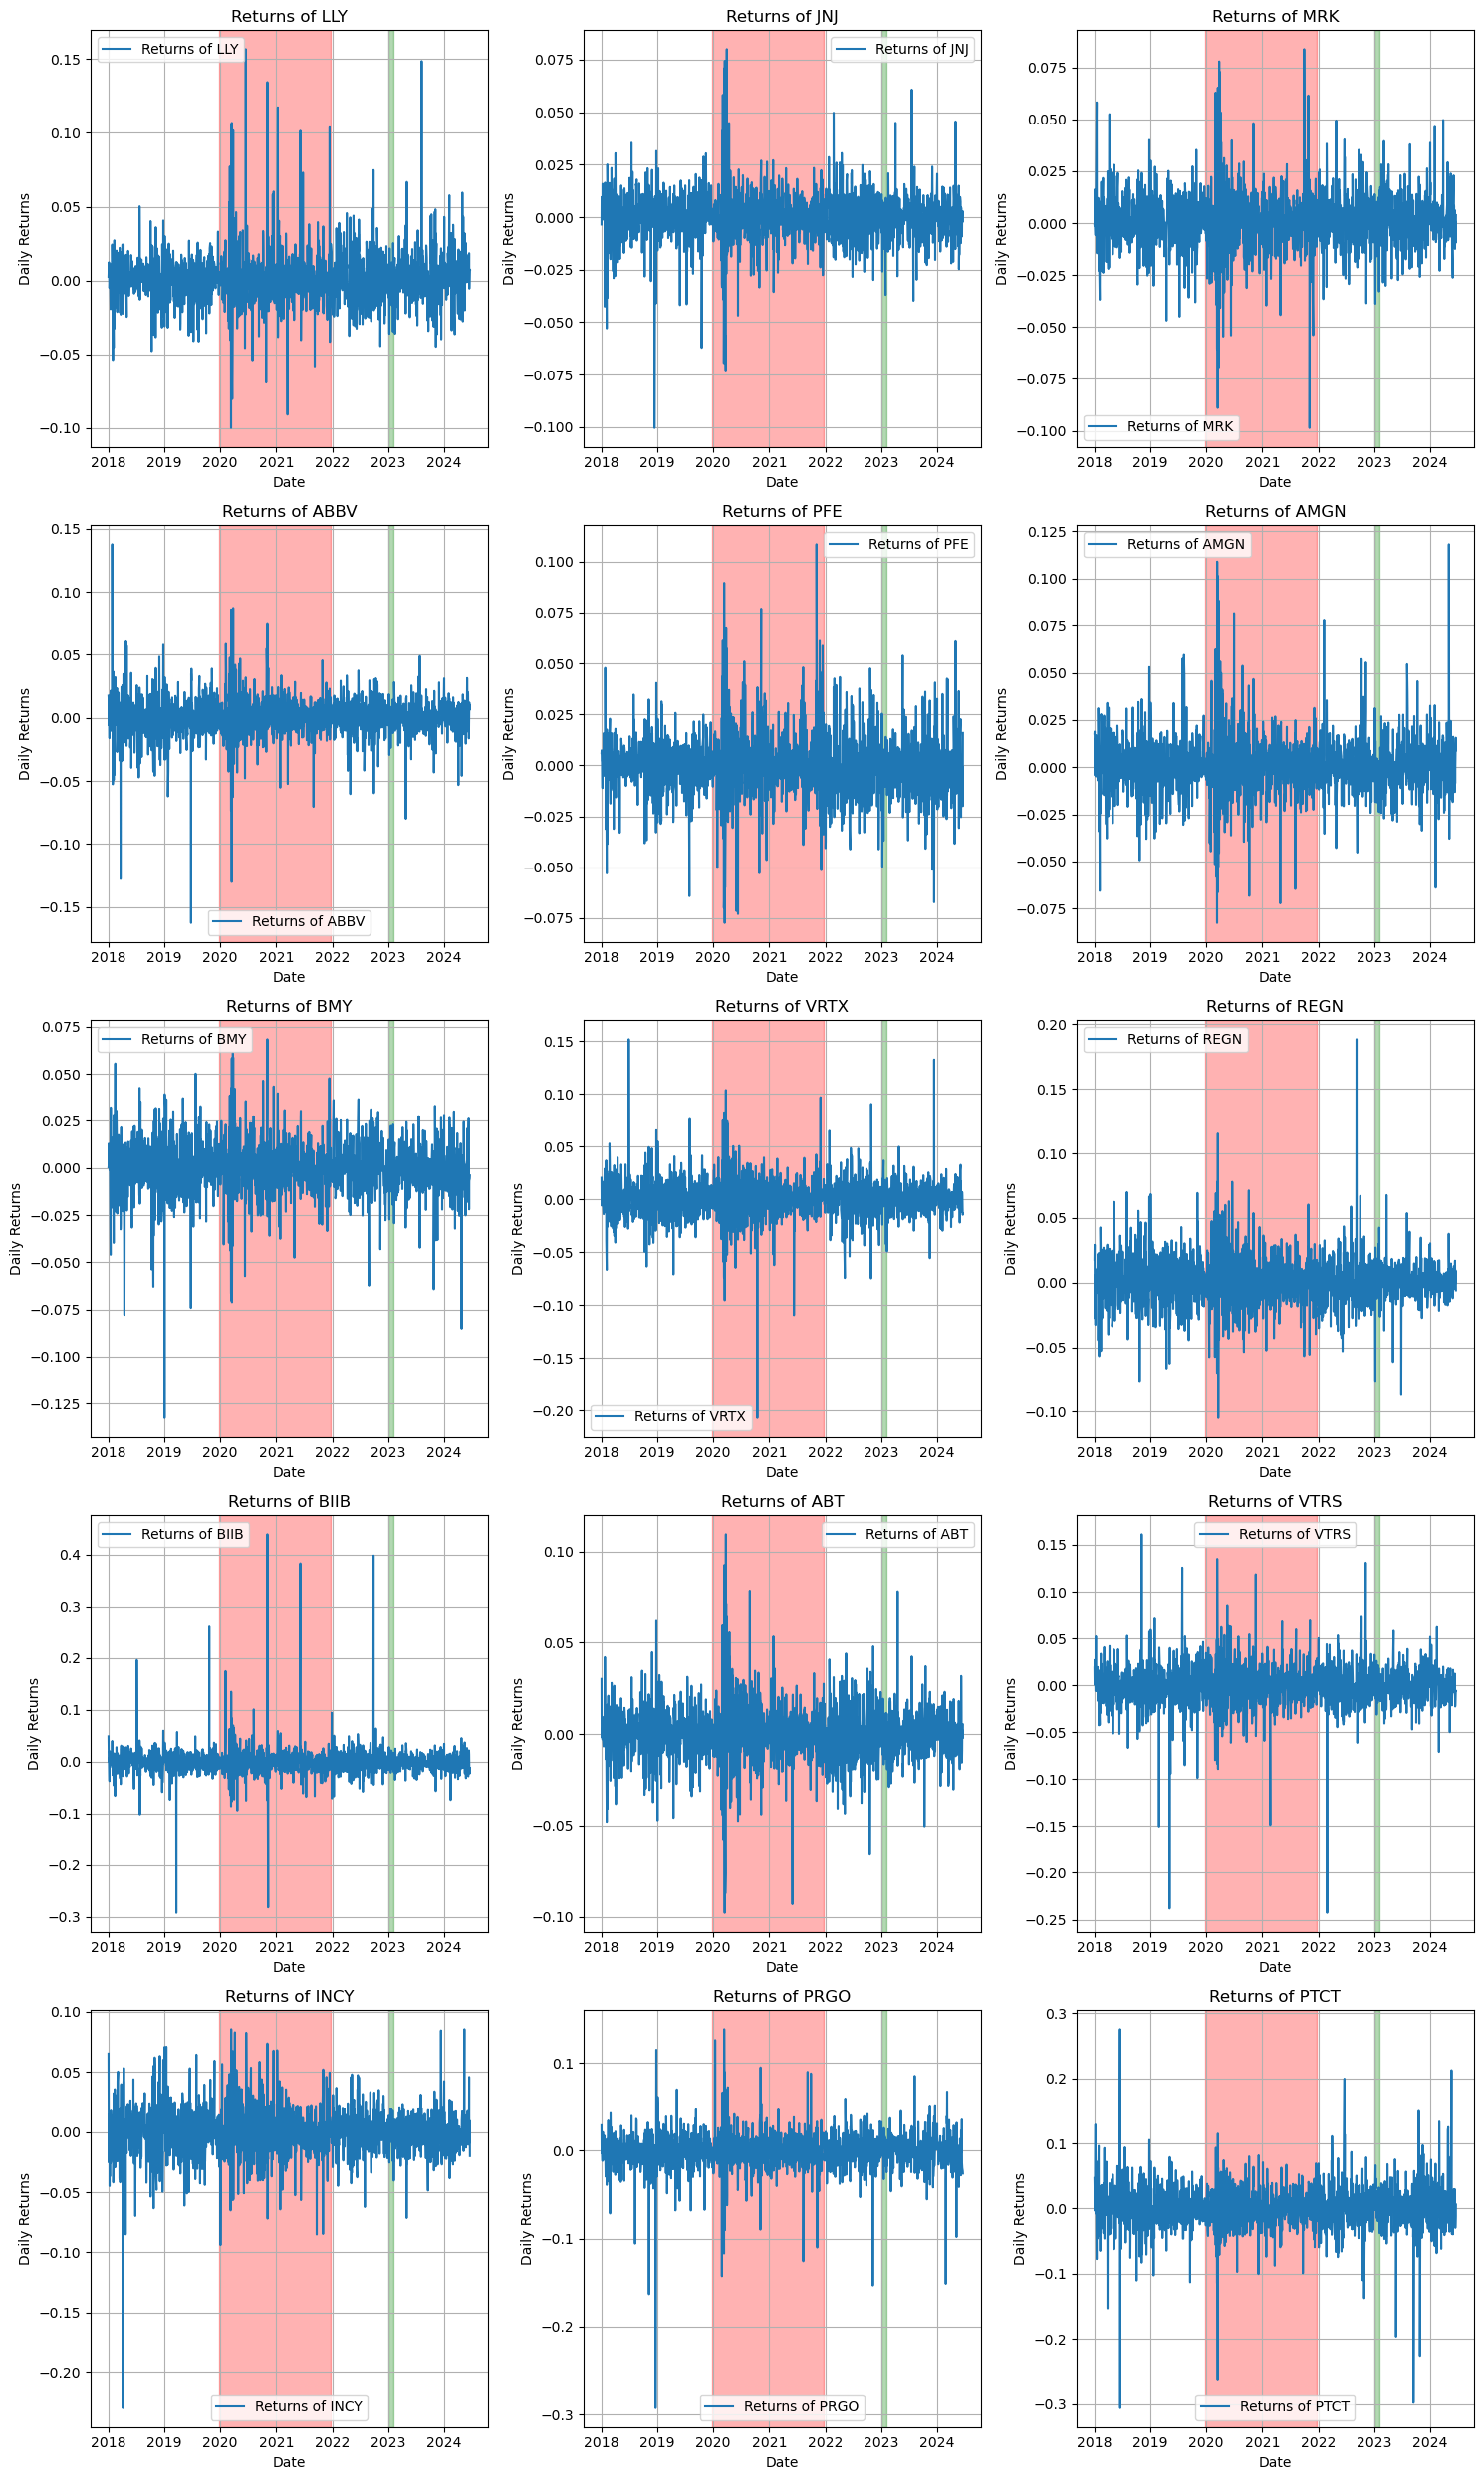

In [1]:
## PYTHON code to extract historical stock data from Yahoo Finance
## Insert package to download data and draw graph

## yfinance for extracting stock data
import yfinance as yf
## pandas statstics packages
import pandas as pd
## matplotlib.pyplot to draw graphs
import matplotlib.pyplot as plt

# Firstly, we need to put the stock tickers that are interested

tickers = ["LLY", "JNJ", "MRK", "ABBV", "PFE", "AMGN", "BMY", 
           "VRTX", "REGN", "BIIB", "ABT", "VTRS", "OGN", "INCY", 
           "PRGO", "AMRX", "PTCT"]

# Because Yahoo Finance will automatic adjust all stocks starting date to a united date, 
# so earlier date will be dropped out. 
# If wanted to exclude stocks with shorter timeframe instead of shorten date, please put excluded tickers here 

exclude_tickers = ["OGN", "AMRX"]

# Filter out the excluded tickers

filtered_tickers = [ticker for ticker in tickers if ticker not in exclude_tickers]


# Main Function to download historical stock data, calculate returns, and plot graphs

def download_calculate_returns_and_plot(tickers, start_date, end_date, cols=4):
    
    # Download data
    stock_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    
    # Save to CSV, if want to calculate return in matlab, just use this csv.
    stock_filename = f"tickers_historical_data.csv"
    stock_data.to_csv(stock_filename)
   
    # Step below is to calculate returns and plot
    # Calculate returns
    returns = stock_data.pct_change().dropna()
    
    # Save to CSV, only return data
    returns_filename = f"tickers_returns.csv"
    returns.to_csv(returns_filename)
    
    print(f"Returns for tickers from {start_date} to {end_date} have been calculated and saved to {returns_filename}")
    
    # Plot returns in subplots
    num_tickers = len(tickers)
    rows = (num_tickers // cols) + (num_tickers % cols > 0)
    
    fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    axs = axs.flatten()
    
    for i, ticker in enumerate(tickers):
        axs[i].plot(returns.index, returns[ticker], label=f'Returns of {ticker}')
        axs[i].set_title(f'Returns of {ticker}')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel('Daily Returns')
        axs[i].legend()
        axs[i].grid(True)
        ## sample of highlight backgroud color, just change dates and colors
        axs[i].axvspan(pd.to_datetime("2019.12.27"), pd.to_datetime("2021.12.21"), color='red', alpha=0.3)
        axs[i].axvspan(pd.to_datetime("2023.01.01"), pd.to_datetime("2023.02.03"), color='green', alpha=0.3)
    
    # Remove any empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.savefig(f"tickers_returns.png")
    plt.show()

# Define the date range
start_date = "2017-12-29"
end_date = "2024-06-20"

# Call the function for each category with the appropriate number of columns
# if with different categories like I do, please copy separately, if only one plot, just leave one row.
download_calculate_returns_and_plot(filtered_tickers, start_date, end_date, cols=3)

## Instruction for constructing index

Step 1: Please adapt ```market_caps = get_market_cap( )``` into the stock series that needed to get Mkt   

Step 2: you can run all the cloumns in between to check if the construction is correct   

Step 3: Don't forget to adapt ```xxxxxx``` to your interest stock   

      stock_data = yf.download( xxxxxx, start=start_date, end=end_date)['Adj Close']
      
Step 4: Last but not least, you have to adapt the plot's name, labels, policy or crisis dates as you wish if you want to plot the index. 


In [2]:
# Function to get market capitalization
def get_market_cap(tickers):
    market_caps = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        market_cap = stock.info.get('marketCap')
        market_caps[ticker] = market_cap
    return market_caps

# Call the function
market_caps = get_market_cap(filtered_tickers)

# Convert to DataFrame
market_caps_df = pd.DataFrame(list(market_caps.items()), columns=['Ticker', 'Market Cap'])

# Save to CSV
market_caps_filename = "filtered_tickers_market_caps.csv"
market_caps_df.to_csv(market_caps_filename, index=False)

print(f"Market capitalizations for filtered tickers have been saved to {market_caps_filename}")

Market capitalizations for filtered tickers have been saved to filtered_tickers_market_caps.csv


In [3]:
# Check market caps
market_caps_df

,Ticker,Market Cap
0,LLY,811498995712
1,JNJ,353348780032
2,MRK,333064503296
3,ABBV,302228635648
4,PFE,155377909760
5,AMGN,167807598592
6,BMY,86151749632
7,VRTX,122317119488
8,REGN,117806465024
9,BIIB,32680701952


In [4]:
# check total market cap
total_market_cap = market_caps_df['Market Cap'].sum()
total_market_cap

2695513865216

In [5]:
# Calculate weights
market_caps_df['Weight'] = (market_caps_df['Market Cap'] / total_market_cap)
market_caps_df

,Ticker,Market Cap,Weight
0,LLY,811498995712,0.301055
1,JNJ,353348780032,0.131088
2,MRK,333064503296,0.123563
3,ABBV,302228635648,0.112123
4,PFE,155377909760,0.057643
5,AMGN,167807598592,0.062254
6,BMY,86151749632,0.031961
7,VRTX,122317119488,0.045378
8,REGN,117806465024,0.043705
9,BIIB,32680701952,0.012124


In [6]:
# Sum up weights making sure it's 1
total = market_caps_df['Weight'].sum()
total

1.0

In [7]:
# Distribute weights to correspondent tickers
weights = market_caps_df.set_index('Ticker')['Weight']
weights

Ticker
LLY     0.301055
JNJ     0.131088
MRK     0.123563
ABBV    0.112123
PFE     0.057643
AMGN    0.062254
BMY     0.031961
VRTX    0.045378
REGN    0.043705
BIIB    0.012124
ABT     0.067687
VTRS    0.004607
INCY    0.004513
PRGO    0.001302
PTCT    0.000996
Name: Weight, dtype: float64

In [9]:
# Download data, remember to change tickers, here's 'chinese_tickers1', but should change to interested variables
stock_data = yf.download(filtered_tickers, start=start_date, end=end_date)['Adj Close']
returns = stock_data.pct_change().dropna()

# Calculate the weighted average returns to create the index
weights = market_caps_df.set_index('Ticker')['Weight']
index_returns = (returns * weights).sum(axis=1)
index_returns

[*********************100%%**********************]  15 of 15 completed


Date
2018-01-02    0.008456
2018-01-03    0.007495
2018-01-04    0.002014
2018-01-05    0.008547
2018-01-08   -0.006092
                ...   
2024-06-12   -0.004880
2024-06-13    0.003763
2024-06-14   -0.000121
2024-06-17    0.001081
2024-06-18    0.004042
Length: 1626, dtype: float64

In [10]:
# Create a DataFrame with dates and index values
index_df = pd.DataFrame({'Date': index_returns.index, 'Index Value': index_returns.values})
index_df

,Date,Index Value
0,2018-01-02,0.008456
1,2018-01-03,0.007495
2,2018-01-04,0.002014
3,2018-01-05,0.008547
4,2018-01-08,-0.006092
...,...,...
1621,2024-06-12,-0.004880
1622,2024-06-13,0.003763
1623,2024-06-14,-0.000121
1624,2024-06-17,0.001081


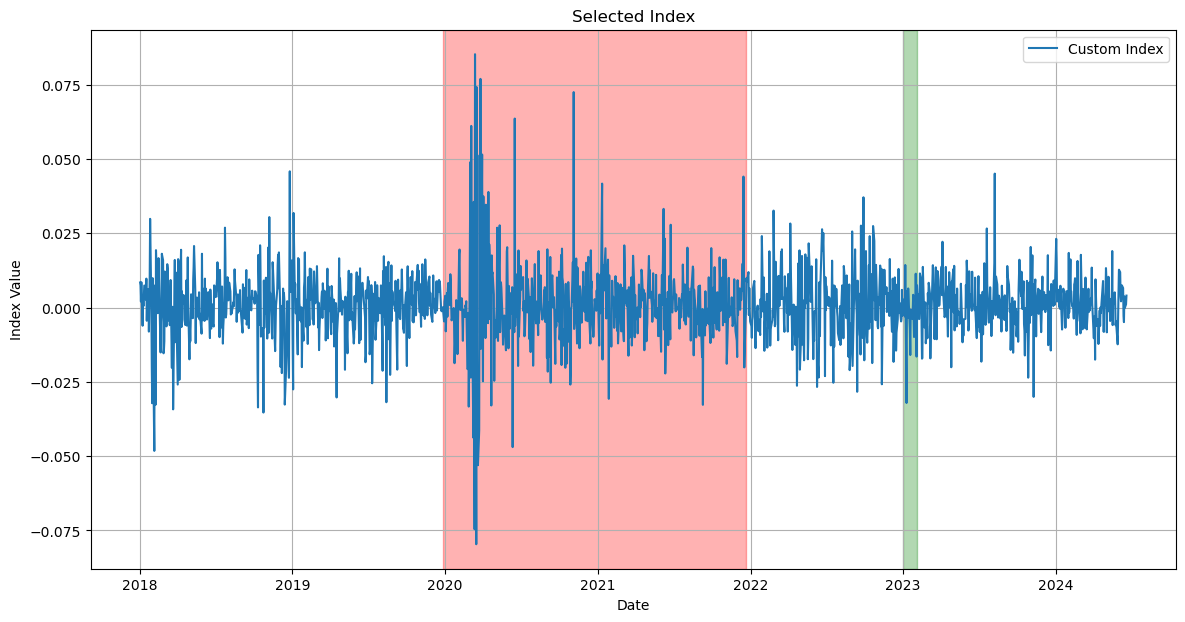

Market capitalization weights and index values have been saved to 'stock_index.csv'.


In [11]:
# Plot the index
# Self-defined title, labels, please change accordingly.
plt.figure(figsize=(14, 7))
plt.plot(index_df['Date'], index_df['Index Value'], label='Custom Index')
plt.axvspan(pd.to_datetime("2019.12.27"), pd.to_datetime("2021.12.21"), color='red', alpha=0.3)
plt.axvspan(pd.to_datetime("2023.01.01"), pd.to_datetime("2023.02.03"), color='green', alpha=0.3)
plt.title('Selected Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


# Save the index values to a CSV file
index_df.to_csv("stock_index.csv", index=False)

print(f"Market capitalization weights and index values have been saved to 'stock_index.csv'.")